In [1]:
import os

import xml.etree.ElementTree as ET

import collections
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
def get_properties(obj):
    properties = {}
    properties['xmin'] = float(obj.find('xmin').text)
    properties['xmax'] = float(obj.find('xmax').text)
    properties['ymin'] = float(obj.find('ymin').text)
    properties['ymax'] = float(obj.find('ymax').text)
    properties['width'] = properties['xmax'] - properties['xmin']
    properties['height'] = properties['ymax'] - properties['ymin']
    return properties
    

In [3]:
main_path = "C:\\Users\\Martyna\\Desktop\\Studia\\INZ\\dane\\RoadDamageDataset\\"

damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# govs corresponds to municipality name.
govs = ["Adachi", "Chiba", "Ichihara", "Muroran", "Nagakute", "Numazu", "Sumida"]

In [4]:
# the number of total images and total labels.
cls_names = []
total_images = 0
total_objects = 0
df = pd.DataFrame(columns=['label','gov','width', 'height', 'xmin', 'xmax', 'ymin', 'ymax'])
for gov in govs:
    
    file_list = os.listdir(main_path + gov + "\\Annotations\\" )

    for file in file_list:
        if file =='.DS_Store' or '._' in file:
            continue
        else:
            total_images = total_images + 1
            infile_xml = open(main_path + gov + "\\Annotations\\" + file)
            tree = ET.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                properties = get_properties(obj.find('bndbox'))
                cls_names.append(cls_name)
                df.loc[total_objects] = [cls_name, gov, properties['width'], properties['height'], 
                              properties['xmin'], properties['xmax'], properties['ymin'], 
                              properties['ymax'],]
                total_objects = total_objects + 1
            
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：9053
# of labels：15457


D00 : 2768, 17.90774406417804 %
D01 : 3789, 24.513165556058745 %
D10 : 742, 4.800414051885877 %
D11 : 636, 4.1146406159021796 %
D20 : 2541, 16.439153781458238 %
D40 : 409, 2.646050333182377 %
D43 : 817, 5.285631105647926 %
D44 : 3733, 24.15087015591641 %


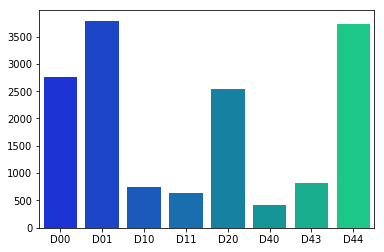

In [12]:
# the number of each class labels.
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + "{}, {} %".format(count_dict[damageType], count_dict[damageType]/len(cls_names) * 100))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

D00 : 538, 18.13279406808224 %
D01 : 754, 25.412874957869903 %
D10 : 107, 3.606336366700371 %
D11 : 117, 3.9433771486349847 %
D20 : 505, 17.020559487698012 %
D40 : 84, 2.8311425682507583 %
D43 : 149, 5.02190765082575 %
D44 : 708, 23.86248736097068 %


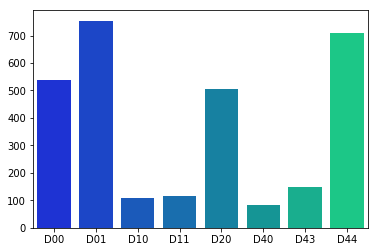

In [7]:
# the number of each class labels in train dataset 
file_path = r'C:\Users\Martyna\Desktop\Studia\INZ\dane\RoadDamageDataset\train\anno'
file_list = os.listdir(file_path)
cls_names = []
cls_count = []
total_images = 0
for file in file_list:
    if file =='.DS_Store' or '._' in file:
        continue
    else:
        total_images = total_images + 1
        infile_xml = open(file_path + '\\' + file)
        tree = ET.parse(infile_xml)
        root = tree.getroot()
        for obj in root.iter('object'):
            cls_name = obj.find('name').text
            properties = get_properties(obj.find('bndbox'))
            cls_names.append(cls_name)
            
count_dict = collections.Counter(cls_names)
            
for damageType in damageTypes:
    print(str(damageType) + ' : ' + "{}, {} %".format(count_dict[damageType], count_dict[damageType]/len(cls_names) * 100))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

D00 : 2230, 17.854283426741393 %
D01 : 3035, 24.299439551641314 %
D10 : 635, 5.084067253803042 %
D11 : 519, 4.155324259407526 %
D20 : 2036, 16.301040832666132 %
D40 : 325, 2.602081665332266 %
D43 : 668, 5.348278622898318 %
D44 : 3025, 24.219375500400318 %


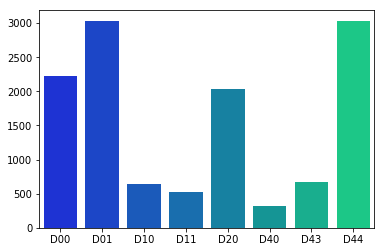

In [10]:
# the number of each class labels in test dataset 
file_path = r'C:\Users\Martyna\Desktop\Studia\INZ\dane\RoadDamageDataset\test\anno'
file_list = os.listdir(file_path)
cls_names = []
cls_count = []
total_images = 0
for file in file_list:
    if file =='.DS_Store' or '._' in file:
        continue
    else:
        total_images = total_images + 1
        infile_xml = open(file_path + '\\' + file)
        tree = ET.parse(infile_xml)
        root = tree.getroot()
        for obj in root.iter('object'):
            cls_name = obj.find('name').text
            properties = get_properties(obj.find('bndbox'))
            cls_names.append(cls_name)
            
count_dict = collections.Counter(cls_names)

for damageType in damageTypes:
    print(str(damageType) + ' : ' + "{}, {} %".format(count_dict[damageType], count_dict[damageType]/len(cls_names) * 100))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

In [5]:
df.head()

,label,gov,width,height,xmin,xmax,ymin,ymax
0,D20,Adachi,139.0,151.0,87.0,226.0,281.0,432.0
1,D20,Adachi,202.0,252.0,1.0,203.0,346.0,598.0
2,D43,Adachi,472.0,112.0,127.0,599.0,267.0,379.0
3,D20,Adachi,200.0,233.0,32.0,232.0,366.0,599.0
4,D44,Adachi,209.0,224.0,346.0,555.0,371.0,595.0


In [6]:
df.describe()

,width,height,xmin,xmax,ymin,ymax
count,15457.000000,15457.000000,15457.00000,15457.000000,15457.000000,15457.000000
mean,204.236333,163.151776,213.47823,417.714563,376.937245,540.089021
std,143.287509,81.553790,142.57081,149.020945,76.927116,71.837078
min,10.000000,11.000000,1.00000,40.000000,42.000000,87.000000
25%,100.000000,98.000000,84.00000,287.000000,329.000000,506.000000
50%,164.000000,157.000000,224.00000,429.000000,381.000000,570.000000
75%,255.000000,225.000000,332.00000,574.000000,431.000000,595.000000
max,599.000000,547.000000,557.00000,600.000000,581.000000,600.000000


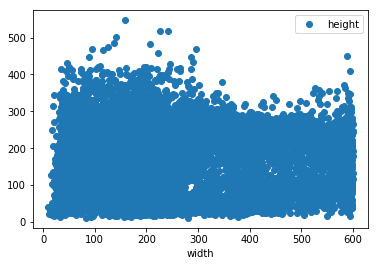

In [7]:
df.plot(x='width', y='height', style='o')

In [26]:
class YOLO_Kmeans:

    def __init__(self, cluster_number, filename):
        self.cluster_number = cluster_number
        self.filename = filename

    def iou(self, boxes, clusters):  # 1 box -> k clusters
        n = boxes.shape[0]
        k = self.cluster_number

        box_area = boxes[:, 0] * boxes[:, 1]
        box_area = box_area.repeat(k)
        box_area = np.reshape(box_area, (n, k))

        cluster_area = clusters[:, 0] * clusters[:, 1]
        cluster_area = np.tile(cluster_area, [1, n])
        cluster_area = np.reshape(cluster_area, (n, k))

        box_w_matrix = np.reshape(boxes[:, 0].repeat(k), (n, k))
        cluster_w_matrix = np.reshape(np.tile(clusters[:, 0], (1, n)), (n, k))
        min_w_matrix = np.minimum(cluster_w_matrix, box_w_matrix)

        box_h_matrix = np.reshape(boxes[:, 1].repeat(k), (n, k))
        cluster_h_matrix = np.reshape(np.tile(clusters[:, 1], (1, n)), (n, k))
        min_h_matrix = np.minimum(cluster_h_matrix, box_h_matrix)
        inter_area = np.multiply(min_w_matrix, min_h_matrix)

        result = inter_area / (box_area + cluster_area - inter_area)
        return result

    def avg_iou(self, boxes, clusters):
        accuracy = np.mean([np.max(self.iou(boxes, clusters), axis=1)])
        return accuracy

    def kmeans(self, boxes, k, dist=np.median):
        box_number = boxes.shape[0]
        distances = np.empty((box_number, k))
        last_nearest = np.zeros((box_number,))
        np.random.seed()
        clusters = boxes[np.random.choice(
            box_number, k, replace=False)]  # init k clusters
        while True:

            distances = 1 - self.iou(boxes, clusters)

            current_nearest = np.argmin(distances, axis=1)
            if (last_nearest == current_nearest).all():
                break  # clusters won't change
            for cluster in range(k):
                clusters[cluster] = dist(  # update clusters
                    boxes[current_nearest == cluster], axis=0)

            last_nearest = current_nearest

        return clusters

    def txt2boxes(self):
        f = open(self.filename, 'r')
        dataSet = []
        for line in f:
            infos = line.split("<>")
            length = len(infos)
            for i in range(1, length):
                width = float(infos[i].split(",")[2]) - \
                    float(infos[i].split(",")[0])
                height = float(infos[i].split(",")[3]) - \
                    float(infos[i].split(",")[1])
                dataSet.append([width, height])
        result = np.array(dataSet)
        f.close()
        return result

    def txt2clusters(self):
        all_boxes = self.txt2boxes()
        result = self.kmeans(all_boxes, k=self.cluster_number)
        result = result[np.lexsort(result.T[0, None])]
        print("K anchors:\n {}".format(result))
        print("Accuracy: {:.2f}%".format(
            self.avg_iou(all_boxes, result) * 100))
        return result

In [58]:
    cluster_number = 5
    filename = r"C:\Users\Martyna\Desktop\Studia\INZ\dane\RoadDamageDataset\train_annotations.txt"
    kmeans = YOLO_Kmeans(cluster_number, filename)
    result = kmeans.txt2clusters()

K anchors:
 [[ 62.  82.]
 [116. 148.]
 [203. 226.]
 [267.  49.]
 [475. 209.]]
Accuracy: 63.86%


In [56]:
def calculate_coords(x1, x2, w, h):
    h = w/2
    w = h/2
    return [x1-w, x2+h, x1+w, x2-h]

In [57]:
from PIL import Image, ImageDraw
img = Image.new('RGB', (500, 500), (255, 255, 255))
x1, x2 = 250, 250
draw = ImageDraw.Draw(img, "RGBA")
for single_res in result:
    coords =  calculate_coords(x1, x2, single_res[0], single_res[1])
    print(coords)
    draw.rectangle(coords, outline='black')
img.save('image.jpg')

[238.5, 273.0, 261.5, 227.0]
[235.75, 278.5, 264.25, 221.5]
[233.75, 282.5, 266.25, 217.5]
[230.25, 289.5, 269.75, 210.5]
[223.0, 304.0, 277.0, 196.0]
[221.25, 307.5, 278.75, 192.5]
[218.75, 312.5, 281.25, 187.5]
[210.75, 328.5, 289.25, 171.5]
[208.0, 334.0, 292.0, 166.0]
[200.25, 349.5, 299.75, 150.5]
[199.5, 351.0, 300.5, 149.0]
[191.5, 367.0, 308.5, 133.0]
[178.25, 393.5, 321.75, 106.5]
[158.25, 433.5, 341.75, 66.5]
[125.0, 500.0, 375.0, 0.0]
[124.5, 501.0, 375.5, -1.0]
